<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_MOD3_AML/blob/main/CORE4_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas del conjunto de entrenamiento:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  Sa

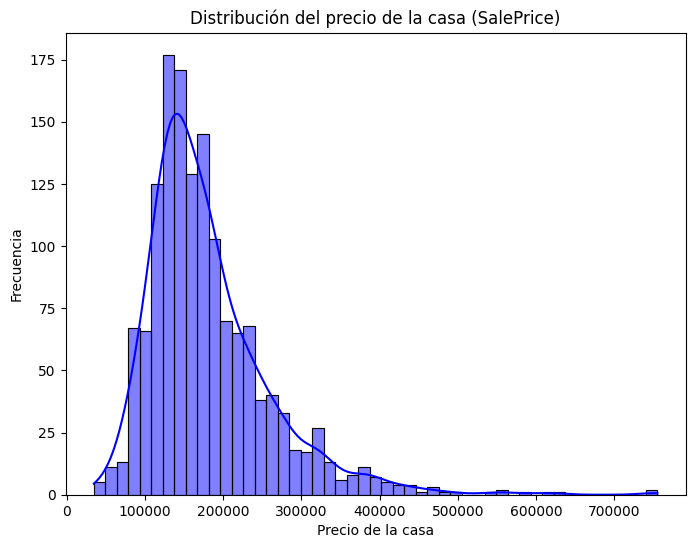

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Exploración inicial
print("Primeras filas del conjunto de entrenamiento:")
print(train_df.head())

# Identificar variables numéricas y categóricas
numericas = train_df.select_dtypes(include=["float64", "int64"]).columns
categoricas = train_df.select_dtypes(include=["object"]).columns

print("\nVariables numéricas:", numericas)
print("\nVariables categóricas:", categoricas)

# Enfocarse en tamaño, habitaciones y calidad
relevantes = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
              'KitchenAbvGr', 'OverallQual', 'OverallCond']
print("\nEstadísticas descriptivas de variables relevantes:")
print(train_df[relevantes].describe())

# Revisar la distribución de la variable objetivo (SalePrice)
plt.figure(figsize=(8, 6))
sns.histplot(train_df['SalePrice'], kde=True, color='blue')
plt.title("Distribución del precio de la casa (SalePrice)")
plt.xlabel("Precio de la casa")
plt.ylabel("Frecuencia")
plt.show()



Asimetría de las variables numéricas:
MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd    

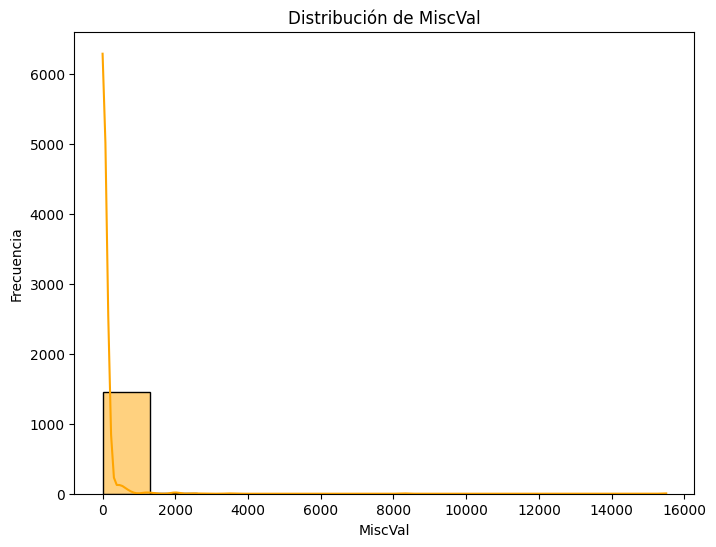

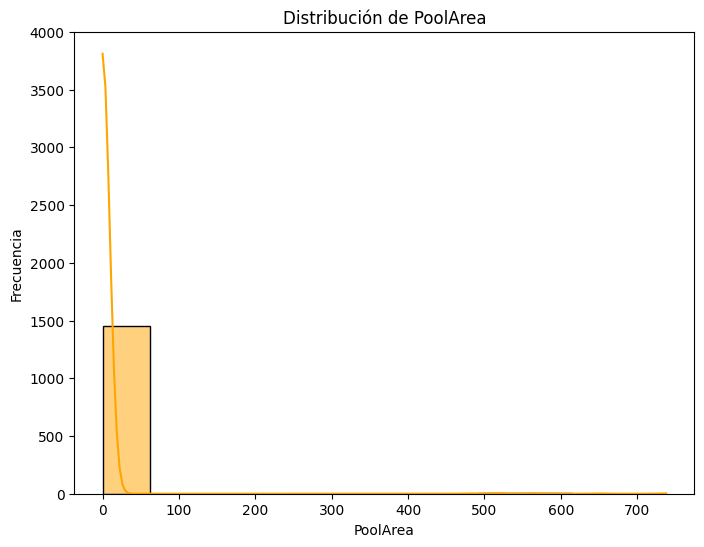

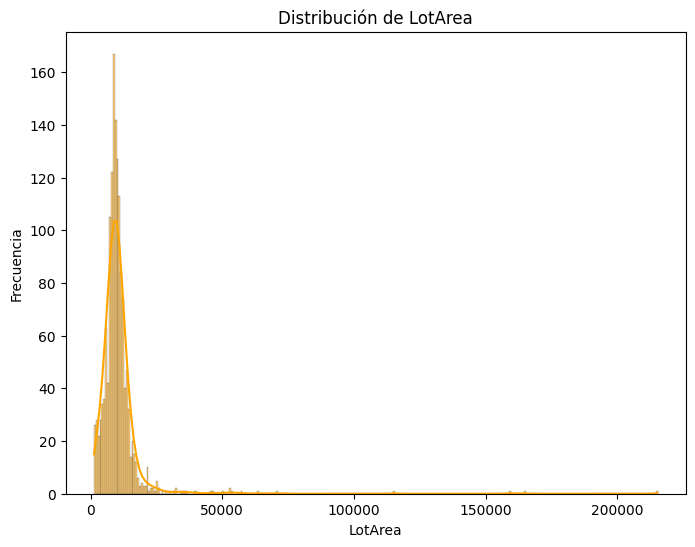

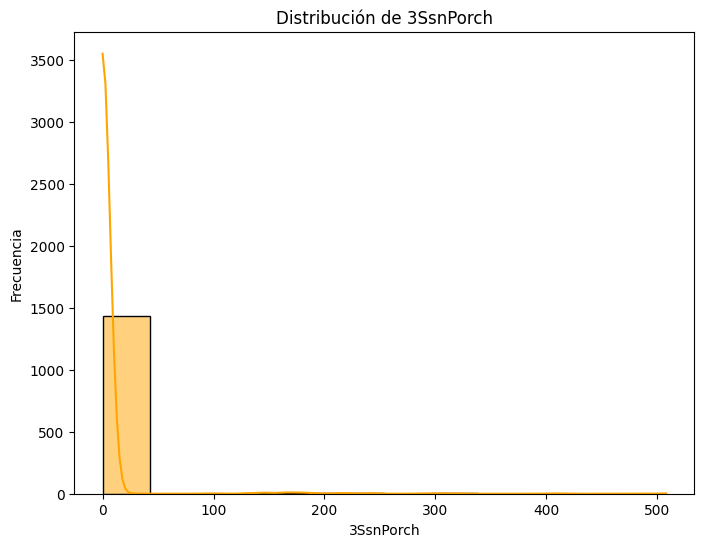

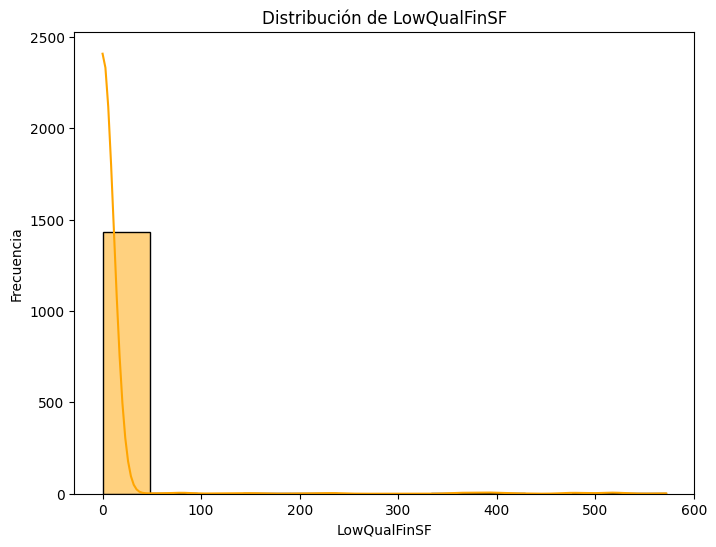

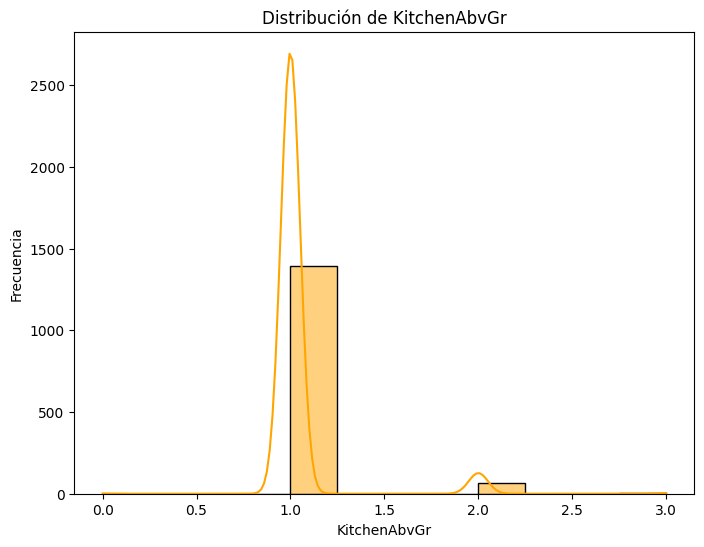

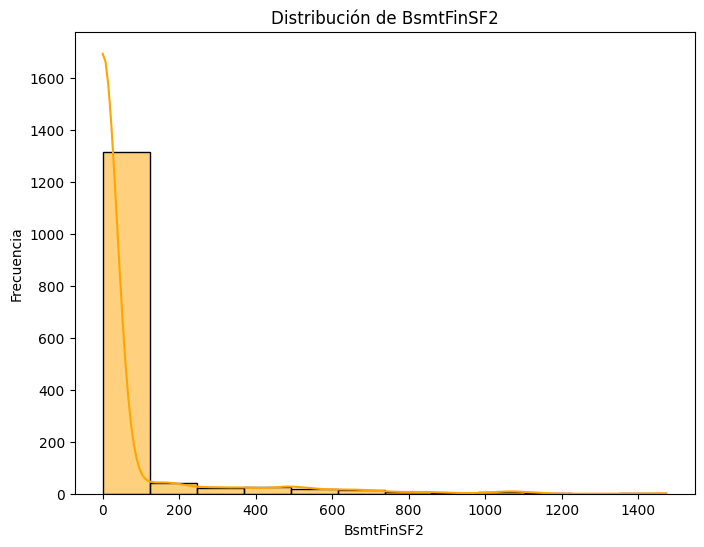

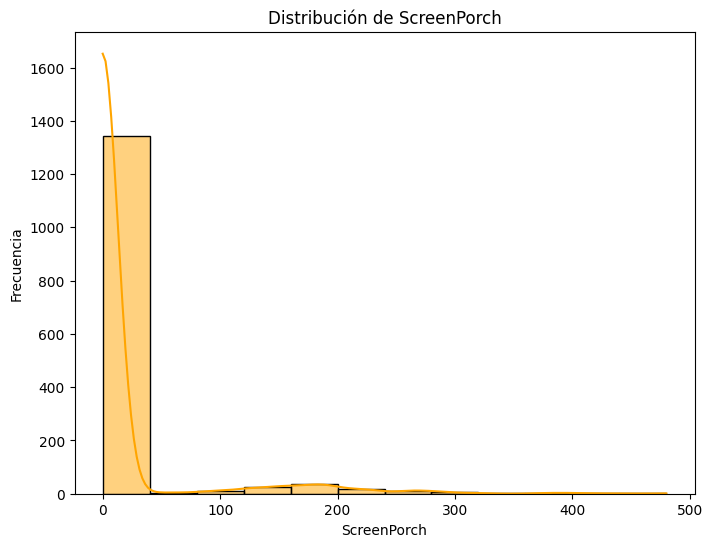

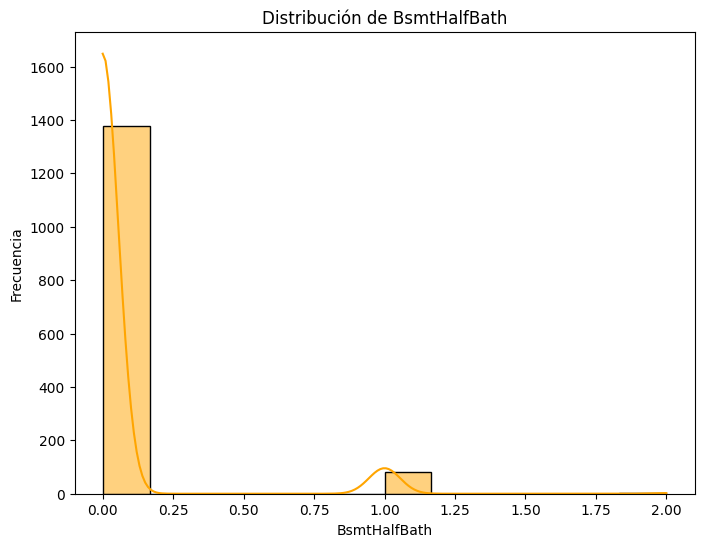

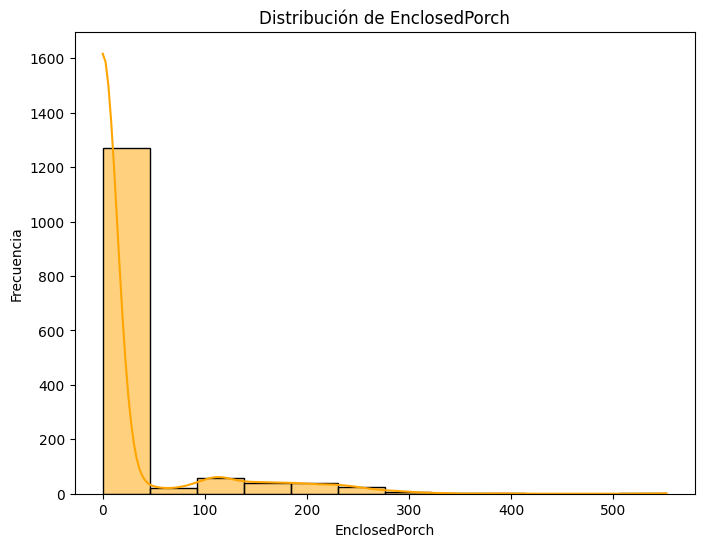

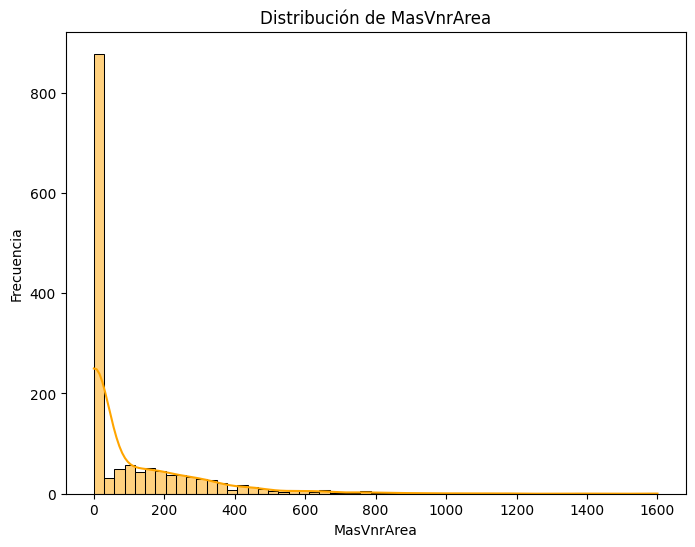

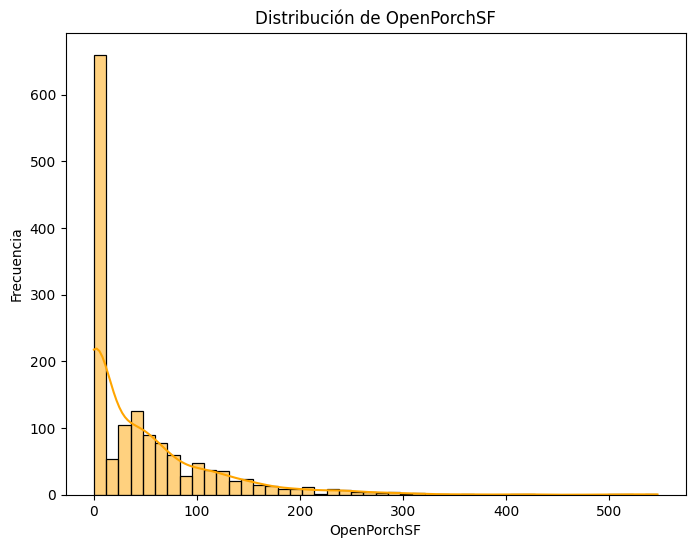

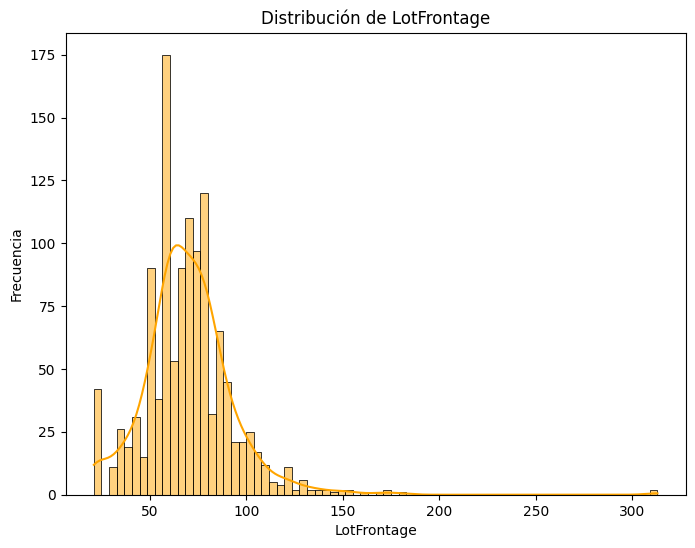

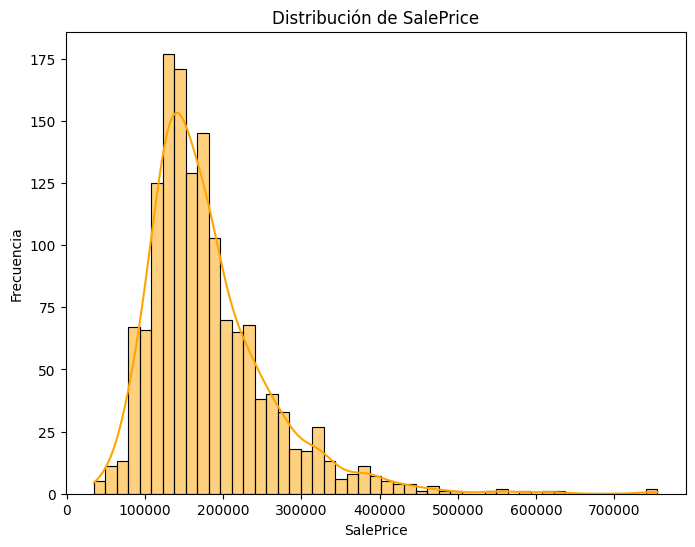

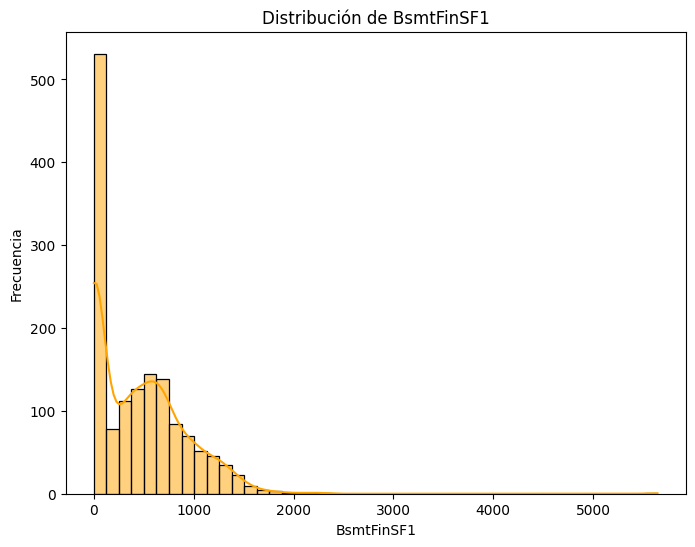

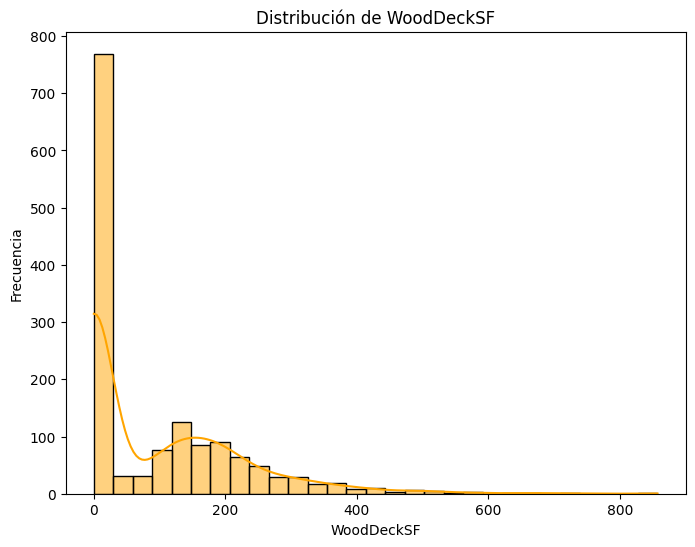

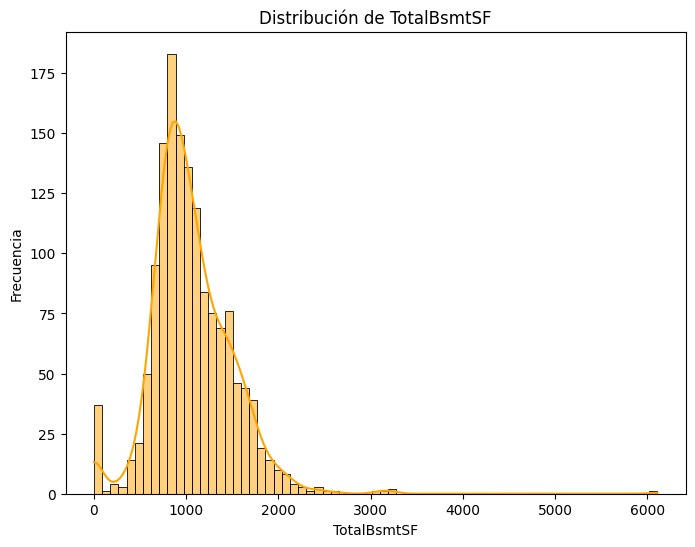

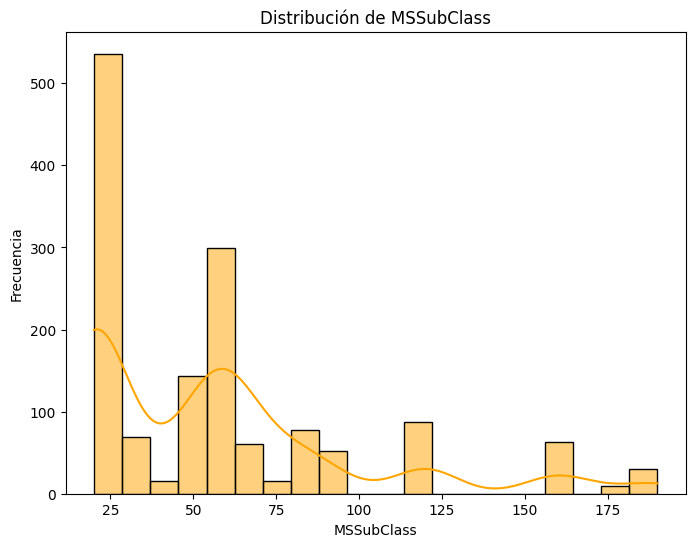

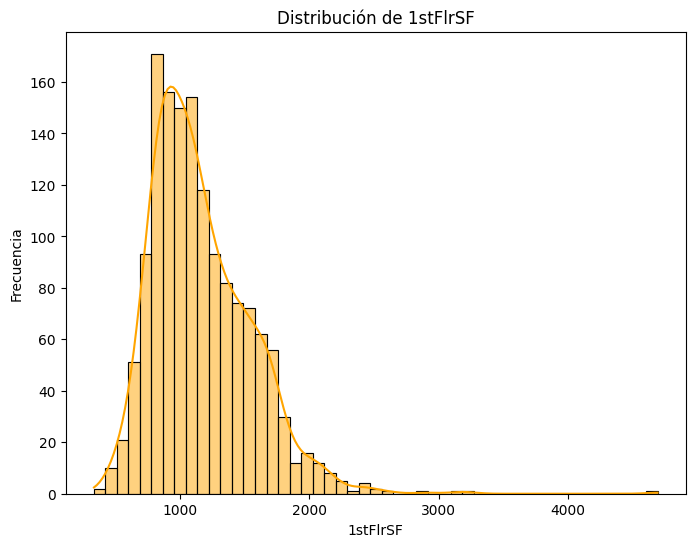

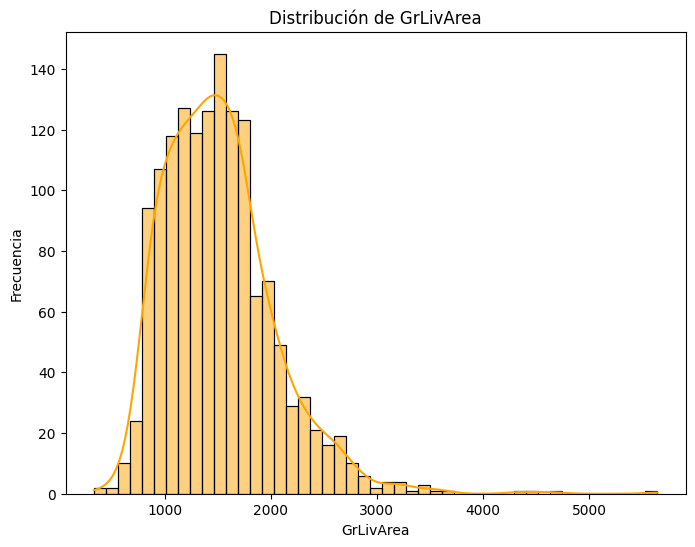


Outliers en GrLivArea: 31 encontrados

Outliers en TotalBsmtSF: 61 encontrados

Outliers en 1stFlrSF: 20 encontrados

Outliers en 2ndFlrSF: 2 encontrados

Outliers en BedroomAbvGr: 35 encontrados

Outliers en KitchenAbvGr: 68 encontrados

Outliers en OverallQual: 2 encontrados

Outliers en OverallCond: 125 encontrados


In [ ]:
# Detectar asimetría (skewness)
skewness = train_df[numericas].skew().sort_values(ascending=False)
print("\nAsimetría de las variables numéricas:")
print(skewness)

# Visualizar variables más sesgadas
variables_sesgadas = skewness[abs(skewness) > 1].index
for var in variables_sesgadas:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_df[var], kde=True, color='orange')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

# Identificar outliers usando el rango intercuartílico (IQR)
for var in relevantes:
    Q1 = train_df[var].quantile(0.25)
    Q3 = train_df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_df[(train_df[var] < Q1 - 1.5 * IQR) | (train_df[var] > Q3 + 1.5 * IQR)]
    print(f"\nOutliers en {var}: {len(outliers)} encontrados")


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Aplicar transformación logarítmica a SalePrice y variables sesgadas
train_df['SalePrice_log'] = np.log1p(train_df['SalePrice'])  # log(1 + x)
for var in variables_sesgadas:
    train_df[f'{var}_log'] = np.log1p(train_df[var])

# Crear variables polinómicas (cuadrado y cubo)
for var in relevantes:
    train_df[f'{var}_sq'] = train_df[var] ** 2
    train_df[f'{var}_cube'] = train_df[var] ** 3

# Estandarizar variables numéricas
scaler = StandardScaler()
numericas_estandarizadas = pd.DataFrame(
    scaler.fit_transform(train_df[numericas]),
    columns=numericas
)
print("\nVariables numéricas estandarizadas:")
print(numericas_estandarizadas.head())



Variables numéricas estandarizadas:
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.208034 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.409895 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084449  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.414011 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.574676  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0   1.050994      0.878668    0.510015    0.575425  ...   -0.752176   
1   0.156734     -0.429577   -0.572835    1.171992  ...    1.626195   
2   0.984752      0.830215    0.322174    0.092907  ...   -0.752176   
3  -1.863632     -0.720298   -0.572835   -0.499274  ...   -0.752176   
4   0.951632      0.733308    1.360826    0.463568  ...    0.780197   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
0 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Variables originales y transformadas
X_original = train_df[relevantes]
y_original = train_df['SalePrice']
X_transformado = train_df[[f'{var}_log' for var in variables_sesgadas] + [f'{var}_sq' for var in relevantes]]
y_transformado = train_df['SalePrice_log']

# Dividir los datos
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_transformado, y_transformado, test_size=0.2, random_state=42)

# Modelo original
modelo_original = LinearRegression()
modelo_original.fit(X_train_orig, y_train_orig)
y_pred_orig = modelo_original.predict(X_test_orig)

rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
r2_orig = r2_score(y_test_orig, y_pred_orig)

# Modelo transformado
modelo_transformado = LinearRegression()
modelo_transformado.fit(X_train_trans, y_train_trans)
y_pred_trans = modelo_transformado.predict(X_test_trans)

rmse_trans = np.sqrt(mean_squared_error(y_test_trans, y_pred_trans))
r2_trans = r2_score(y_test_trans, y_pred_trans)

print("\nRendimiento del modelo original:")
print(f"RMSE: {rmse_orig:.4f}, R-squared: {r2_orig:.4f}")

print("\nRendimiento del modelo transformado:")
print(f"RMSE: {rmse_trans:.4f}, R-squared: {r2_trans:.4f}")
